In [ ]:
"""
To run different experiments with how can optimize the mesh subtraction

"""

# Making theh bbox_mesh_restriction not an axis aligned bounding box

In [ ]:
"""
Try to get a good oriented bounding box for bbox subtraction
elephant_mesh.bounding_box_oriented.volume
"""

In [1]:
from os import sys
sys.path.append("../meshAfterParty/")

In [11]:
import skeleton_utils as sk
import trimesh_utils as tu
import trimesh
import numpy as np

elephant_mesh = trimesh.load_mesh("../test_neurons/elephant.off")
el_bones = sk.read_skeleton_edges_coordinates("../test_neurons/elephant_skeleton.cgal")
el_verts,el_edges  = sk.convert_skeleton_to_nodes_edges(el_bones)

only one skeleton so no stacking needed


In [5]:
elephant_skeleton_verts_mesh = trimesh.Trimesh(vertices=el_verts,faces=np.array([]))

In [15]:
elephant_skeleton_verts_mesh.bounding_box_oriented.contains(np.array([[0,0,0],
                                                                      [1,1,1]]))

array([ True, False])

# -- Trying the mesh bounding box on the elephant mesh

In [ ]:

#elephant_skeleton = sk.skeletonize_connected_branch(elephant_mesh)
elephant_skeleton_verts_mesh = trimesh.Trimesh(vertices=el_verts)
sk.graph_skeleton_and_mesh(other_meshes=[elephant_mesh],
                           other_meshes_colors=[[0,1,0,0.2],[1,0,0,0.2]],
                          other_skeletons=[elephant_skeleton])

In [ ]:
elephant_skeleton_verts_mesh.bounding_box_oriented

In [10]:
elephant_mesh.bounding_box_oriented.volume, elephant_mesh.bounding_box.volume

(0.2948310587038134, 0.434394325508)

In [ ]:
# practice getting an axis aligned bounding box for the mesh
new_skeleton_mesh = 

In [17]:
elephant_mesh.bounding_box.contains(np.array([[0,0,0],
                                                [1,1,1]]))

array([ True, False])

# Exploring the skeleton to mesh correspondence

In [ ]:
"""
Purpose: 
To look at what it would look like if you colored the meshes by just which skeleton branch was trying
to subtract it in mesh subtraction

Pseudocode: 
1) Have a way of picking out the skeletons branches of a whole skeleton
2) Send each branch to the mesh subtraction and get the faces that it would try to subtract
- have to alter it so doesn't do the bbox_restriction
= just want to return the faces it is trying to subtract and not do the significance thresholding

3) do this for all branches so that for each branch have corresponding mesh face and skeleton
4) graph the skeletons and faces by (have automatic coloring)

"""

# - Way of picking out skeleton branches -

In [ ]:
"""  THIS COULD BE A BETTER WAY OF DOING THE CLEANING
Pseudocode: 
eliminate all of the skeletal nodes that have a degree higher than 2
then split into components
for each component:
- add back any neighbors of all the vertices of the component that are not part of the branch sugraph (total verts)
- get an induced subgraph from all of the verts
- transform the graph back into a skeleton

"""

In [22]:
elephant_skeleton = sk.read_skeleton_edges_coordinates("../test_neurons/elephant_skeleton.cgal")
sk.graph_skeleton_and_mesh(other_skeletons=[elephant_skeleton])

only one skeleton so no stacking needed


In [34]:
from importlib import reload
sk = reload(sk)

import networkx_utils as xu
el_sk_graph = sk.convert_skeleton_to_graph(elephant_skeleton)
el_sk_graph = xu.remove_selfloops(el_sk_graph)
branch_nodes = [k for k,v in dict(el_sk_graph.degree).items() if v <= 2]
seperated_branch_graph = el_sk_graph.subgraph(branch_nodes)
seperated_branch_skeleton = sk.convert_graph_to_skeleton(seperated_branch_graph)

sk.graph_skeleton_and_mesh(other_skeletons=[seperated_branch_skeleton])

In [68]:
branch_skeletons_stacked.shape

(304, 2, 3)

In [69]:
elephant_skeleton.shape

(304, 2, 3)

In [67]:
#then split into components
import networkx as nx

import networkx_utils as xu
from tqdm.notebook import tqdm
xu = reload(xu)

branch_skeletons = []

seperated_branch_graph_comp = list(nx.connected_components(seperated_branch_graph))
# now add back the nodes that were missing for each branch and collect all of the skeletons
for curr_branch in tqdm(seperated_branch_graph_comp):
    all_neighbors = [xu.get_neighbors(el_sk_graph,n) for n in curr_branch] 
    all_neighbors.append(list(curr_branch))
    total_neighbors = np.unique(np.hstack(all_neighbors))
    branch_subgraph = el_sk_graph.subgraph(total_neighbors)
    branch_skeletons.append(sk.convert_graph_to_skeleton(branch_subgraph))

#visualize the skeleton
branch_skeletons_stacked = sk.stack_skeletons(branch_skeletons)
sk.graph_skeleton_and_mesh(other_skeletons=[branch_skeletons_stacked])
    



In [78]:
# testing out the function
sk = reload(sk)
elephant_skeleton_branches = sk.decompose_skeleton_to_branches(elephant_skeleton)
sk.graph_skeleton_and_mesh(other_skeletons=[sk.stack_skeletons(elephant_skeleton_branches)])

# Exploring the Mesh subtraction

In [ ]:
"""
2) Send each branch to the mesh subtraction and get the faces that it would try to subtract
- have to alter it so doesn't do the bbox_restriction
= just want to return the faces it is trying to subtract and not do the significance thresholding
"""

In [108]:
from skeleton_utils import *
def mesh_subtraction_by_skeleton_new(main_mesh,edges,
                                 buffer=0.01,
                                bbox_ratio=1.2,
                                 distance_threshold=2000,
                             significance_threshold=500,
                                print_flag=False):
    """
    Purpose: Will return significant mesh pieces that are
    not already accounteed for by the skeleton
    
    Example of how to run
    
    main_mesh_path = Path("./Dustin/Dustin.off")
    main_mesh = trimesh.load_mesh(str(main_mesh_path.absolute()))
    skeleton_path = main_mesh_path.parents[0] / Path(main_mesh_path.stem + "_skeleton.cgal")
    edges = sk.read_skeleton_edges_coordinates(str(skeleton_path.absolute()))

    # turn this into nodes and edges
    main_mesh_nodes, main_mesh_edges = sk.read_skeleton_verts_edges(str(skeleton_path.absolute()))
    sk.graph_skeleton_and_mesh(
                main_mesh_verts=main_mesh.vertices,
                main_mesh_faces=main_mesh.faces,
                unique_skeleton_verts_final = main_mesh_nodes,
                edges_final=main_mesh_edges,
                buffer = 0
                              )
                              
    leftover_pieces =  mesh_subtraction_by_skeleton(main_mesh,edges,
                                 buffer=0.01,
                                bbox_ratio=1.2,
                                 distance_threshold=500,
                             significance_threshold=500,
                                print_flag=False)
                                
    # Visualize the results: 
    pieces_mesh = trimesh.Trimesh(vertices=np.array([]),
                                 faces=np.array([]))

    for l in leftover_pieces:
        pieces_mesh += l

    sk.graph_skeleton_and_mesh(
                main_mesh_verts=pieces_mesh.vertices,
                main_mesh_faces=pieces_mesh.faces,
                unique_skeleton_verts_final = main_mesh_nodes,
                edges_final=main_mesh_edges,
                buffer = 0
                              )
    
    """
    

    
    """ This part will be removed for trial because don't trust bbox restriction without whole skeleton
    
    skeleton_nodes = edges.reshape(-1,3)
    skeleton_bounding_corners = np.vstack([np.max(skeleton_nodes,axis=0),
               np.min(skeleton_nodes,axis=0)])
    
        
    main_mesh_bbox_restricted, faces_bbox_inclusion = tu.bbox_mesh_restriction(main_mesh,
                                                                        skeleton_bounding_corners,
                                                                        bbox_ratio)
    
    if type(main_mesh_bbox_restricted) == type(trimesh.Trimesh()):
        print(f"Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = {len(main_mesh_bbox_restricted.faces)}")
    else:
        print("***** Bounding Box Restricted Mesh is empty ****")
        main_mesh_bbox_restricted = main_mesh
        faces_bbox_inclusion = np.arange(0,len(main_mesh.faces))
    
    """
    
    main_mesh_bbox_restricted = main_mesh
    faces_bbox_inclusion = np.arange(0,len(main_mesh.faces))

    
    start_time = time.time()

    #face_subtract_color = []
    face_subtract_indices = []

    
    edge_loop_print=False
    for i,ex_edge in tqdm(enumerate(edges)):
        #print("\n------ New loop ------")
        #print(ex_edge)
        
        # ----------- creating edge and checking distance ----- #
        loop_start = time.time()
        
        edge_line = ex_edge[1] - ex_edge[0]
        sum_threshold = 0.001
        if np.sum(np.abs(edge_line)) < sum_threshold:
            if edge_loop_print:
                print(f"edge number {i}, {ex_edge}: has sum less than {sum_threshold} so skipping")
            continue
#         if edge_loop_print:
#             print(f"Checking Edge Distance = {time.time()-loop_start}")
#         loop_start = time.time()
        
        cob_edge = change_basis_matrix(edge_line)
        
#         if edge_loop_print:
#             print(f"Change of Basis Matrix calculation = {time.time()-loop_start}")
#         loop_start - time.time()
        
        #get the limits of the example edge itself that should be cutoff
        edge_trans = (cob_edge@ex_edge.T)
        slice_range = np.sort(edge_trans[2,:])

        # adding the buffer to the slice range
        slice_range_buffer = slice_range + np.array([-buffer,buffer])
        
#         if edge_loop_print:
#             print(f"Calculate slice= {time.time()-loop_start}")
#         loop_start = time.time()

        # generate face midpoints from the triangles
        #face_midpoints = np.mean(main_mesh_bbox_restricted.vertices[main_mesh_bbox_restricted.faces],axis=1) # Old way
        face_midpoints = main_mesh_bbox_restricted.triangles_center
        
#         if edge_loop_print:
#             print(f"Face midpoints= {time.time()-loop_start}")
#         loop_start = time.time()
        
        #get the face midpoints that fall within the slice (by lookig at the z component)
        fac_midpoints_trans = cob_edge@face_midpoints.T
        
#         if edge_loop_print:
#             print(f"Face midpoints transform= {time.time()-loop_start}")
#         loop_start = time.time()
        
        
        
#         if edge_loop_print:
#             print(f"edge midpoint= {time.time()-loop_start}")
#         loop_start = time.time()
        
        slice_mask_pre_distance = ((fac_midpoints_trans[2,:]>slice_range_buffer[0]) & 
                      (fac_midpoints_trans[2,:]<slice_range_buffer[1]))

        if edge_loop_print:
            print(f"Applying slice restriction = {time.time()-loop_start}")
        loop_start = time.time()
        
#         print(f"(fac_midpoints_trans.T)[:,:2] = {(fac_midpoints_trans.T)[:,:2].shape}")
#         print(f"face_midpoints[:,:2] = {face_midpoints[:,:2].shape}")
#         print(f"edge_trans.T = {(edge_trans.T).shape}")
#         print(f"ex_edge = {ex_edge.shape}")
        """ 6/18 change
        # apply the distance threshold to the slice mask
        
        edge_midpoint = np.mean(ex_edge,axis=0)
        #raise Exception("Add in part for distance threshold here")
        distance_check = np.linalg.norm(face_midpoints[:,:2] - edge_midpoint[:2],axis=1) < distance_threshold
        
        
        """
        edge_midpoint = np.mean(edge_trans.T,axis=0)
        distance_check = np.linalg.norm((fac_midpoints_trans.T)[:,:2] - edge_midpoint[:2],axis=1) < distance_threshold
        
        

        slice_mask = slice_mask_pre_distance & distance_check
        
        if edge_loop_print:
            print(f"Applying distance restriction= {time.time()-loop_start}")
        loop_start = time.time()


        face_list = np.arange(0,len(main_mesh_bbox_restricted.faces))[slice_mask]

        #get the submesh of valid faces within the slice
        if len(face_list)>0:
            main_mesh_sub = main_mesh_bbox_restricted.submesh([face_list],append=True)
        else:
            main_mesh_sub = []
        
        

        if type(main_mesh_sub) != type(trimesh.Trimesh()):
            if edge_loop_print:
                print(f"THERE WERE NO FACES THAT FIT THE DISTANCE ({distance_threshold}) and Z transform requirements")
                print("So just skipping this edge")
            continue

        if edge_loop_print:
            print(f"getting submesh= {time.time()-loop_start}")
        loop_start = time.time()
        
        #get all disconnected mesh pieces of the submesh and the face indices for lookup later
        sub_components,sub_components_face_indexes = tu.split(main_mesh_sub,only_watertight=False)
        if type(sub_components) != type(np.array([])) and type(sub_components) != list:
            print(f"meshes = {sub_components}, with type = {type(sub_components)}")
            if type(sub_components) == type(trimesh.Trimesh()) :
                sub_components = [sub_components]
            else:
                raise Exception("The sub_components were not an array, list or trimesh")
        
        if edge_loop_print:
            print(f"splitting the mesh= {time.time()-loop_start}")
        loop_start = time.time()

        #getting the indices of the submeshes whose bounding box contain the edge 
        """ 6-19: might want to use bounding_box_oriented? BUT THIS CHANGE COULD SLOW IT DOWN
        contains_points_results = np.array([s_comp.bounding_box_oriented.contains(ex_edge.reshape(-1,3)) for s_comp in sub_components])
        """
        contains_points_results = np.array([s_comp.bounding_box.contains(ex_edge.reshape(-1,3)) for s_comp in sub_components])
        
        containing_indices = (np.arange(0,len(sub_components)))[np.sum(contains_points_results,axis=1) >= len(ex_edge)]
        
        if edge_loop_print:
            print(f"containing indices= {time.time()-loop_start}")
        loop_start = time.time()

        if len(containing_indices) != 1: 
            if edge_loop_print:
                print(f"--> Not exactly one containing mesh: {containing_indices}")
            if len(containing_indices) > 1:
                sub_components_inner = sub_components[containing_indices]
                sub_components_face_indexes_inner = sub_components_face_indexes[containing_indices]
            else:
                sub_components_inner = sub_components
                sub_components_face_indexes_inner = sub_components_face_indexes

            #get the center of the edge
            edge_center = np.mean(ex_edge,axis=0)
            #print(f"edge_center = {edge_center}")

            #find the distance between eacch bbox center and the edge center
            bbox_centers = [np.mean(k.bounds,axis=0) for k in sub_components_inner]
            #print(f"bbox_centers = {bbox_centers}")
            closest_bbox = np.argmin([np.linalg.norm(edge_center-b_center) for b_center in bbox_centers])
            #print(f"bbox_distance = {closest_bbox}")
            edge_skeleton_faces = faces_bbox_inclusion[face_list[sub_components_face_indexes_inner[closest_bbox]]]
            if edge_loop_print:
                print(f"finding closest box when 0 or 2 or more containing boxes= {time.time()-loop_start}")
            loop_start = time.time()
        else:# when only one viable submesh piece and just using that sole index
            #print(f"only one viable submesh piece so using index only number in: {containing_indices}")
            
            edge_skeleton_faces = faces_bbox_inclusion[face_list[sub_components_face_indexes[containing_indices[0]]]]
            if edge_loop_print:
                print(f"only 1 containig face getting the edge_skeleton_faces= {time.time()-loop_start}")
            loop_start = time.time()

        if len(edge_skeleton_faces) < 0:
            print(f"****** Warning the edge index {i}: had no faces in the edge_skeleton_faces*******")
        face_subtract_indices.append(edge_skeleton_faces)
        if edge_loop_print:
                print(f"check and append for face= {time.time()-loop_start}")
        #face_subtract_color.append(viable_colors[i%len(viable_colors)])
        
    print(f"Total Mesh subtraction time = {np.round(time.time() - start_time,4)}")
    #print(f"face_subtract_indices = {face_subtract_indices}")
    
    unique_removed_faces = []
    if len(face_subtract_indices)>0:
        all_removed_faces = np.concatenate(face_subtract_indices)

        unique_removed_faces = set(all_removed_faces)

        faces_to_keep = set(np.arange(0,len(main_mesh.faces))).difference(unique_removed_faces)
        new_submesh = main_mesh.submesh([list(faces_to_keep)],only_watertight=False,append=True)
    else:
        new_submesh = main_mesh
    
    return unique_removed_faces
    """    
    significant_pieces = split_significant_pieces(new_submesh,
                                                         significance_threshold,
                                                         print_flag=False)
    return significant_pieces
    """

    

# test on actual neurons

In [80]:
saved_file = "../Platinum_Compartment/soma_touching_mesh_data.npz"
current_mesh_data = nu.load_dict(saved_file)

In [145]:
len(curr_limb_branches_sk)

72

In [146]:
curr_branch_sk.reshape

<function ndarray.reshape>

In [141]:
soma_containing_idx= 0
limb_idx = 1
curr_limb_mesh = current_mesh_data[soma_containing_idx]["branch_meshes"][limb_idx]
curr_limb_sk = current_mesh_data[soma_containing_idx]["branch_skeletons"][limb_idx]
sk.graph_skeleton_and_mesh(other_meshes=[curr_limb_mesh],
                          other_skeletons=[curr_limb_sk])


curr_limb_branches_sk = sk.decompose_skeleton_to_branches(curr_limb_sk)
branch_idx = 0
curr_branch_sk = curr_limb_branches_sk[branch_idx]

sk.graph_skeleton_and_mesh(other_meshes=[curr_limb_mesh],
                          other_skeletons=[curr_branch_sk])

In [ ]:
# 

In [151]:
"""
Pseudocode: 

"""

curr_branch_face_indices = mesh_subtraction_by_skeleton_new(
    curr_limb_mesh,
    curr_branch_sk,
    buffer=100,
    bbox_ratio=1.2,
    distance_threshold=3000,
    significance_threshold=5,
    print_flag=False
)
current_subemsh = curr_limb_mesh.submesh([list(curr_branch_face_indices)],append=True)
current_subemsh.show()


Total Mesh subtraction time = 0.6079


# create a whole coloring of all of the limb from the different branches

In [125]:
import trimesh 
x = trimesh.Trimesh()
list(x)

TypeError: 'Trimesh' object is not iterable

In [152]:
sk = reload(sk)
tu = reload(tu)
from tqdm.notebook import tqdm
import time

start_time = time.time()

limb_correspondence = dict()
soma_containing_idx= 0

total_branch_meshes = []
total_branch_skeletons = []

for soma_containing_idx in current_mesh_data.keys():
    for limb_idx,curr_limb_mesh in enumerate(current_mesh_data[soma_containing_idx]["branch_meshes"]):
        print(f"Working on limb #{limb_idx}")
        limb_correspondence[limb_idx] = dict()
        curr_limb_sk = current_mesh_data[soma_containing_idx]["branch_skeletons"][limb_idx]
        curr_limb_branches_sk = sk.decompose_skeleton_to_branches(curr_limb_sk)
        for j,curr_branch_sk in tqdm(enumerate(curr_limb_branches_sk)):
            limb_correspondence[limb_idx][j] = dict()
            curr_branch_face_correspondence = mesh_subtraction_by_skeleton_new(
                                    curr_limb_mesh,
                                    curr_branch_sk,
                                    buffer=100,
                                    bbox_ratio=1.2,
                                    distance_threshold=3000,
                                    significance_threshold=500,
                                    print_flag=False
                                )
            if len(curr_branch_face_correspondence) > 0:
                curr_submesh = curr_limb_mesh.submesh([list(curr_branch_face_correspondence)],append=True)
            else:
                curr_submesh = trimesh.Trimesh(vertices=np.array([]),faces=np.array([]))
                
            limb_correspondence[limb_idx][j]["correspondence_mesh"] = curr_submesh
            limb_correspondence[limb_idx][j]["correspondence_face_idx"] = curr_branch_face_correspondence
            
            total_branch_meshes.append(curr_submesh)
            total_branch_skeletons.append(curr_branch_sk)
            
print(f"Total time = {time.time() - start_time}")

Working on limb #0



Total Mesh subtraction time = 1.1769



Total Mesh subtraction time = 0.4937



Total Mesh subtraction time = 0.0707



Total Mesh subtraction time = 0.6444



Total Mesh subtraction time = 0.268



Total Mesh subtraction time = 0.1649



Total Mesh subtraction time = 0.4203



Total Mesh subtraction time = 0.2816



Total Mesh subtraction time = 0.0372



Total Mesh subtraction time = 0.1863



Total Mesh subtraction time = 0.4944



Total Mesh subtraction time = 0.9431



Total Mesh subtraction time = 0.1929



Total Mesh subtraction time = 2.1372



Total Mesh subtraction time = 3.5969



Total Mesh subtraction time = 0.0606



Total Mesh subtraction time = 0.6759



Total Mesh subtraction time = 0.0847



Total Mesh subtraction time = 0.4758



Total Mesh subtraction time = 0.2462



Total Mesh subtraction time = 0.0393



Total Mesh subtraction time = 1.3146



Total Mesh subtraction time = 1.0009



Total Mesh subtraction time = 0.152



Total Mesh subtraction time = 0.1672



Total Mesh subtraction time = 0.1412



Total Mesh subtraction time = 0.1887



Total Mesh subtraction time = 3.3508



Total Mesh subtraction time = 0.8985



Total Mesh subtraction time = 0.6496



Total Mesh subtraction time = 2.3127



Total Mesh subtraction time = 0.0748



Total Mesh subtraction time = 0.8506



Total Mesh subtraction time = 0.3426



Total Mesh subtraction time = 0.0753



Total Mesh subtraction time = 2.0535



Total Mesh subtraction time = 0.0511



Total Mesh subtraction time = 0.1219



Total Mesh subtraction time = 0.0415



Total Mesh subtraction time = 0.2538



Total Mesh subtraction time = 1.375



Total Mesh subtraction time = 0.706



Total Mesh subtraction time = 0.747



Total Mesh subtraction time = 0.7172



Total Mesh subtraction time = 0.2581



Total Mesh subtraction time = 0.7362



Total Mesh subtraction time = 0.1669



Total Mesh subtraction time = 0.3951



Total Mesh subtraction time = 0.8483



Total Mesh subtraction time = 1.5566



Total Mesh subtraction time = 0.6779



Total Mesh subtraction time = 0.1544



Total Mesh subtraction time = 0.3503



Total Mesh subtraction time = 0.2183



Total Mesh subtraction time = 0.3953



Total Mesh subtraction time = 0.0518



Total Mesh subtraction time = 0.134



Total Mesh subtraction time = 0.4704



Total Mesh subtraction time = 1.0967



Total Mesh subtraction time = 0.2956



Total Mesh subtraction time = 0.2051



Total Mesh subtraction time = 0.3702



Total Mesh subtraction time = 0.245



Total Mesh subtraction time = 0.0604



Total Mesh subtraction time = 0.1788



Total Mesh subtraction time = 0.2493



Total Mesh subtraction time = 0.0773



Total Mesh subtraction time = 0.6646



Total Mesh subtraction time = 0.051



Total Mesh subtraction time = 0.52



Total Mesh subtraction time = 0.0417



Total Mesh subtraction time = 2.0472



Total Mesh subtraction time = 0.1582



Total Mesh subtraction time = 0.0827



Total Mesh subtraction time = 0.058



Total Mesh subtraction time = 0.3851



Total Mesh subtraction time = 0.099



Total Mesh subtraction time = 0.3035



Total Mesh subtraction time = 0.2022



Total Mesh subtraction time = 0.1329



Total Mesh subtraction time = 0.1691



Total Mesh subtraction time = 0.3602



Total Mesh subtraction time = 1.4024



Total Mesh subtraction time = 0.5003



Total Mesh subtraction time = 0.3818



Total Mesh subtraction time = 0.0783



Total Mesh subtraction time = 0.1477



Total Mesh subtraction time = 0.3932



Total Mesh subtraction time = 0.4685



Total Mesh subtraction time = 0.6942



Total Mesh subtraction time = 0.321



Total Mesh subtraction time = 0.2695



Total Mesh subtraction time = 0.2304



Total Mesh subtraction time = 0.2493



Total Mesh subtraction time = 0.2976



Total Mesh subtraction time = 2.0712



Total Mesh subtraction time = 1.4602



Total Mesh subtraction time = 0.1939



Total Mesh subtraction time = 0.1748



Total Mesh subtraction time = 0.9388



Total Mesh subtraction time = 1.5128



Total Mesh subtraction time = 1.6317



Total Mesh subtraction time = 0.1141



Total Mesh subtraction time = 0.4672



Total Mesh subtraction time = 0.0596



Total Mesh subtraction time = 0.1098



Total Mesh subtraction time = 0.8127



Total Mesh subtraction time = 0.3079



Total Mesh subtraction time = 0.3055



Total Mesh subtraction time = 0.6944



Total Mesh subtraction time = 0.0829



Total Mesh subtraction time = 0.2405



Total Mesh subtraction time = 2.3374



Total Mesh subtraction time = 0.3266



Total Mesh subtraction time = 1.1034



Total Mesh subtraction time = 0.0422



Total Mesh subtraction time = 0.5605



Total Mesh subtraction time = 1.4936



Total Mesh subtraction time = 0.0634



Total Mesh subtraction time = 0.4093



Total Mesh subtraction time = 0.4925



Total Mesh subtraction time = 1.1455



Total Mesh subtraction time = 0.1476



Total Mesh subtraction time = 0.0659



Total Mesh subtraction time = 0.0427



Total Mesh subtraction time = 0.4329

Working on limb #1



Total Mesh subtraction time = 0.5764



Total Mesh subtraction time = 2.2015



Total Mesh subtraction time = 0.0915



Total Mesh subtraction time = 0.3439



Total Mesh subtraction time = 0.2971



Total Mesh subtraction time = 0.0412



Total Mesh subtraction time = 0.9156



Total Mesh subtraction time = 0.0963



Total Mesh subtraction time = 0.4857



Total Mesh subtraction time = 1.0554



Total Mesh subtraction time = 0.0601



Total Mesh subtraction time = 0.2501



Total Mesh subtraction time = 1.917



Total Mesh subtraction time = 0.1135



Total Mesh subtraction time = 1.3425



Total Mesh subtraction time = 0.6683



Total Mesh subtraction time = 0.0476



Total Mesh subtraction time = 0.3031



Total Mesh subtraction time = 0.0769



Total Mesh subtraction time = 0.2267



Total Mesh subtraction time = 0.3833



Total Mesh subtraction time = 0.3706



Total Mesh subtraction time = 0.3151



Total Mesh subtraction time = 1.2105



Total Mesh subtraction time = 1.1321



Total Mesh subtraction time = 0.5704



Total Mesh subtraction time = 0.8396



Total Mesh subtraction time = 0.0501



Total Mesh subtraction time = 2.8355



Total Mesh subtraction time = 1.1755



Total Mesh subtraction time = 0.55



Total Mesh subtraction time = 0.9024



Total Mesh subtraction time = 0.062



Total Mesh subtraction time = 0.9514



Total Mesh subtraction time = 0.0465



Total Mesh subtraction time = 0.1816



Total Mesh subtraction time = 0.039



Total Mesh subtraction time = 0.9034



Total Mesh subtraction time = 1.0445



Total Mesh subtraction time = 0.0803



Total Mesh subtraction time = 0.2164



Total Mesh subtraction time = 0.7324



Total Mesh subtraction time = 0.7179



Total Mesh subtraction time = 0.7172



Total Mesh subtraction time = 0.2972



Total Mesh subtraction time = 0.1521



Total Mesh subtraction time = 0.2244



Total Mesh subtraction time = 0.4367



Total Mesh subtraction time = 0.6501



Total Mesh subtraction time = 0.0584



Total Mesh subtraction time = 0.607



Total Mesh subtraction time = 0.2616



Total Mesh subtraction time = 0.0619



Total Mesh subtraction time = 1.8701



Total Mesh subtraction time = 0.5567



Total Mesh subtraction time = 0.3349



Total Mesh subtraction time = 0.2342



Total Mesh subtraction time = 1.9448



Total Mesh subtraction time = 0.07



Total Mesh subtraction time = 0.5032



Total Mesh subtraction time = 0.1396



Total Mesh subtraction time = 0.2907



Total Mesh subtraction time = 0.4226



Total Mesh subtraction time = 0.7524



Total Mesh subtraction time = 0.3894



Total Mesh subtraction time = 0.2435



Total Mesh subtraction time = 0.0493



Total Mesh subtraction time = 0.0831



Total Mesh subtraction time = 1.2782



Total Mesh subtraction time = 0.7353



Total Mesh subtraction time = 0.126



Total Mesh subtraction time = 1.334

Working on limb #2



Total Mesh subtraction time = 0.8846



Total Mesh subtraction time = 0.375



Total Mesh subtraction time = 0.5436



Total Mesh subtraction time = 0.6807



Total Mesh subtraction time = 0.9625



Total Mesh subtraction time = 0.3226



Total Mesh subtraction time = 0.2357



Total Mesh subtraction time = 0.0863



Total Mesh subtraction time = 0.0837



Total Mesh subtraction time = 0.0602



Total Mesh subtraction time = 0.0375



Total Mesh subtraction time = 0.0769



Total Mesh subtraction time = 0.4173



Total Mesh subtraction time = 1.1705



Total Mesh subtraction time = 0.0344



Total Mesh subtraction time = 0.1858



Total Mesh subtraction time = 0.839



Total Mesh subtraction time = 1.041



Total Mesh subtraction time = 0.3556



Total Mesh subtraction time = 0.0547



Total Mesh subtraction time = 0.2257



Total Mesh subtraction time = 0.0931



Total Mesh subtraction time = 1.2752



Total Mesh subtraction time = 0.0589



Total Mesh subtraction time = 0.6221



Total Mesh subtraction time = 0.0871



Total Mesh subtraction time = 0.5139



Total Mesh subtraction time = 0.4232



Total Mesh subtraction time = 0.0993



Total Mesh subtraction time = 0.0491



Total Mesh subtraction time = 0.0573



Total Mesh subtraction time = 0.1326



Total Mesh subtraction time = 0.6366



Total Mesh subtraction time = 0.5437



Total Mesh subtraction time = 1.0999



Total Mesh subtraction time = 0.0623



Total Mesh subtraction time = 0.3909



Total Mesh subtraction time = 1.8093



Total Mesh subtraction time = 1.2689



Total Mesh subtraction time = 0.0643



Total Mesh subtraction time = 0.1555



Total Mesh subtraction time = 0.9754



Total Mesh subtraction time = 0.4399



Total Mesh subtraction time = 0.0987



Total Mesh subtraction time = 0.0626



Total Mesh subtraction time = 0.3786



Total Mesh subtraction time = 0.1291



Total Mesh subtraction time = 0.7695



Total Mesh subtraction time = 0.4494



Total Mesh subtraction time = 0.3567



Total Mesh subtraction time = 0.0852



Total Mesh subtraction time = 0.4165



Total Mesh subtraction time = 0.1078



Total Mesh subtraction time = 0.2309



Total Mesh subtraction time = 0.1121



Total Mesh subtraction time = 0.7483



Total Mesh subtraction time = 0.2681



Total Mesh subtraction time = 0.334



Total Mesh subtraction time = 0.0487



Total Mesh subtraction time = 0.1099



Total Mesh subtraction time = 0.1597



Total Mesh subtraction time = 0.0828



Total Mesh subtraction time = 0.1321



Total Mesh subtraction time = 0.3572



Total Mesh subtraction time = 0.1198



Total Mesh subtraction time = 0.6914



Total Mesh subtraction time = 0.2874



Total Mesh subtraction time = 0.4677

Working on limb #3



Total Mesh subtraction time = 0.7172



Total Mesh subtraction time = 0.2692



Total Mesh subtraction time = 0.0431



Total Mesh subtraction time = 0.7835



Total Mesh subtraction time = 1.6347



Total Mesh subtraction time = 1.2242



Total Mesh subtraction time = 0.0575



Total Mesh subtraction time = 0.052



Total Mesh subtraction time = 1.461



Total Mesh subtraction time = 0.5109



Total Mesh subtraction time = 0.2494



Total Mesh subtraction time = 1.2237



Total Mesh subtraction time = 0.5354



Total Mesh subtraction time = 0.1951



Total Mesh subtraction time = 0.5796



Total Mesh subtraction time = 0.4363



Total Mesh subtraction time = 0.2803



Total Mesh subtraction time = 0.0383



Total Mesh subtraction time = 0.2366



Total Mesh subtraction time = 0.5005



Total Mesh subtraction time = 0.0488



Total Mesh subtraction time = 0.3034



Total Mesh subtraction time = 0.5862



Total Mesh subtraction time = 0.2205



Total Mesh subtraction time = 0.2493



Total Mesh subtraction time = 0.2517



Total Mesh subtraction time = 0.0507



Total Mesh subtraction time = 0.1386



Total Mesh subtraction time = 0.2443



Total Mesh subtraction time = 0.0702



Total Mesh subtraction time = 0.6593



Total Mesh subtraction time = 2.2338



Total Mesh subtraction time = 0.3903



Total Mesh subtraction time = 0.7095



Total Mesh subtraction time = 0.0462



Total Mesh subtraction time = 0.213



Total Mesh subtraction time = 0.1942



Total Mesh subtraction time = 0.2324



Total Mesh subtraction time = 0.1213



Total Mesh subtraction time = 0.1726



Total Mesh subtraction time = 0.694



Total Mesh subtraction time = 0.1104



Total Mesh subtraction time = 0.0445



Total Mesh subtraction time = 0.2097



Total Mesh subtraction time = 0.3758



Total Mesh subtraction time = 0.5071



Total Mesh subtraction time = 0.2412



Total Mesh subtraction time = 0.3332



Total Mesh subtraction time = 0.2308



Total Mesh subtraction time = 0.3988



Total Mesh subtraction time = 0.1084



Total Mesh subtraction time = 0.4482



Total Mesh subtraction time = 0.177



Total Mesh subtraction time = 0.9934

Working on limb #4



Total Mesh subtraction time = 0.7274



Total Mesh subtraction time = 0.372



Total Mesh subtraction time = 0.0761



Total Mesh subtraction time = 0.1055



Total Mesh subtraction time = 0.2824



Total Mesh subtraction time = 0.4075



Total Mesh subtraction time = 1.6608



Total Mesh subtraction time = 1.3434



Total Mesh subtraction time = 0.4465



Total Mesh subtraction time = 0.1182



Total Mesh subtraction time = 0.1935



Total Mesh subtraction time = 0.051



Total Mesh subtraction time = 0.1731



Total Mesh subtraction time = 0.091



Total Mesh subtraction time = 0.0725



Total Mesh subtraction time = 0.2351



Total Mesh subtraction time = 0.6192



Total Mesh subtraction time = 0.3248



Total Mesh subtraction time = 0.3824



Total Mesh subtraction time = 0.0754



Total Mesh subtraction time = 0.3407



Total Mesh subtraction time = 0.1337



Total Mesh subtraction time = 0.5952



Total Mesh subtraction time = 0.2759



Total Mesh subtraction time = 0.0449



Total Mesh subtraction time = 0.6107



Total Mesh subtraction time = 0.8781



Total Mesh subtraction time = 0.0701



Total Mesh subtraction time = 0.2155



Total Mesh subtraction time = 0.4165



Total Mesh subtraction time = 0.5187



Total Mesh subtraction time = 0.0771



Total Mesh subtraction time = 0.0465



Total Mesh subtraction time = 0.3587



Total Mesh subtraction time = 1.3836



Total Mesh subtraction time = 0.6271



Total Mesh subtraction time = 0.0827



Total Mesh subtraction time = 0.1945



Total Mesh subtraction time = 0.259



Total Mesh subtraction time = 0.1059



Total Mesh subtraction time = 0.0867



Total Mesh subtraction time = 0.4871



Total Mesh subtraction time = 0.1633



Total Mesh subtraction time = 0.0326



Total Mesh subtraction time = 0.0509



Total Mesh subtraction time = 1.1637



Total Mesh subtraction time = 0.2655



Total Mesh subtraction time = 0.0755



Total Mesh subtraction time = 0.033



Total Mesh subtraction time = 0.9348



Total Mesh subtraction time = 0.0931



Total Mesh subtraction time = 0.3645



Total Mesh subtraction time = 0.2329



Total Mesh subtraction time = 0.055



Total Mesh subtraction time = 0.0625



Total Mesh subtraction time = 1.0058



Total Mesh subtraction time = 0.0537



Total Mesh subtraction time = 0.8905



Total Mesh subtraction time = 0.3241



Total Mesh subtraction time = 1.0003



Total Mesh subtraction time = 0.1847



Total Mesh subtraction time = 0.0339



Total Mesh subtraction time = 0.0614



Total Mesh subtraction time = 0.0577



Total Mesh subtraction time = 0.1351



Total Mesh subtraction time = 0.5507



Total Mesh subtraction time = 0.1398



Total Mesh subtraction time = 0.033



Total Mesh subtraction time = 0.3147



Total Mesh subtraction time = 0.0862



Total Mesh subtraction time = 0.3332



Total Mesh subtraction time = 0.1589



Total Mesh subtraction time = 0.5832



Total Mesh subtraction time = 0.0703



Total Mesh subtraction time = 0.222



Total Mesh subtraction time = 0.2572



Total Mesh subtraction time = 1.995



Total Mesh subtraction time = 0.0355



Total Mesh subtraction time = 0.2577

Working on limb #5



Total Mesh subtraction time = 2.0431



Total Mesh subtraction time = 0.1857



Total Mesh subtraction time = 0.1077



Total Mesh subtraction time = 0.6439



Total Mesh subtraction time = 0.0879



Total Mesh subtraction time = 3.2585



Total Mesh subtraction time = 0.1705



Total Mesh subtraction time = 0.0342



Total Mesh subtraction time = 0.2132



Total Mesh subtraction time = 0.3018



Total Mesh subtraction time = 0.5642



Total Mesh subtraction time = 0.0639



Total Mesh subtraction time = 1.363



Total Mesh subtraction time = 0.1408



Total Mesh subtraction time = 0.4771



Total Mesh subtraction time = 0.6687



Total Mesh subtraction time = 0.4363



Total Mesh subtraction time = 0.1838



Total Mesh subtraction time = 0.1054



Total Mesh subtraction time = 0.3028



Total Mesh subtraction time = 1.8921



Total Mesh subtraction time = 0.4225

Working on limb #6



Total Mesh subtraction time = 1.2414



Total Mesh subtraction time = 1.5483



Total Mesh subtraction time = 0.7819



Total Mesh subtraction time = 0.7314



Total Mesh subtraction time = 0.0818



Total Mesh subtraction time = 0.2349



Total Mesh subtraction time = 0.058



Total Mesh subtraction time = 0.1228



Total Mesh subtraction time = 0.0408



Total Mesh subtraction time = 0.0715



Total Mesh subtraction time = 0.0605



Total Mesh subtraction time = 0.5305



Total Mesh subtraction time = 0.1257



Total Mesh subtraction time = 0.0307



Total Mesh subtraction time = 0.2601



Total Mesh subtraction time = 0.133



Total Mesh subtraction time = 0.6189



Total Mesh subtraction time = 0.0532



Total Mesh subtraction time = 0.209



Total Mesh subtraction time = 0.0514



Total Mesh subtraction time = 0.3442



Total Mesh subtraction time = 0.117



Total Mesh subtraction time = 0.1484



Total Mesh subtraction time = 0.1



Total Mesh subtraction time = 0.1695



Total Mesh subtraction time = 0.6883



Total Mesh subtraction time = 0.7125



Total Mesh subtraction time = 0.0811



Total Mesh subtraction time = 0.2741



Total Mesh subtraction time = 0.056



Total Mesh subtraction time = 1.7961

Working on limb #7



Total Mesh subtraction time = 1.0849



Total Mesh subtraction time = 0.3796



Total Mesh subtraction time = 0.2447



Total Mesh subtraction time = 0.1797



Total Mesh subtraction time = 0.0848



Total Mesh subtraction time = 0.1855



Total Mesh subtraction time = 0.5176



Total Mesh subtraction time = 0.0349



Total Mesh subtraction time = 0.3877



Total Mesh subtraction time = 0.2912



Total Mesh subtraction time = 0.2901



Total Mesh subtraction time = 0.0454



Total Mesh subtraction time = 0.0657



Total Mesh subtraction time = 0.9344



Total Mesh subtraction time = 0.4247



Total Mesh subtraction time = 0.0509



Total Mesh subtraction time = 0.123



Total Mesh subtraction time = 0.2891



Total Mesh subtraction time = 0.0928



Total Mesh subtraction time = 0.1254



Total Mesh subtraction time = 0.4913



Total Mesh subtraction time = 0.066



Total Mesh subtraction time = 0.6109



Total Mesh subtraction time = 0.0732



Total Mesh subtraction time = 0.2329



Total Mesh subtraction time = 0.0708



Total Mesh subtraction time = 0.8055



Total Mesh subtraction time = 0.2936



Total Mesh subtraction time = 0.0533



Total Mesh subtraction time = 0.1509



Total Mesh subtraction time = 0.8987



Total Mesh subtraction time = 0.0671



Total Mesh subtraction time = 0.0537



Total Mesh subtraction time = 0.4714



Total Mesh subtraction time = 0.4571



Total Mesh subtraction time = 0.0883



Total Mesh subtraction time = 0.0493



Total Mesh subtraction time = 0.0629



Total Mesh subtraction time = 0.5704



Total Mesh subtraction time = 0.4929

Working on limb #8



Total Mesh subtraction time = 0.657



Total Mesh subtraction time = 0.0533



Total Mesh subtraction time = 0.1118



Total Mesh subtraction time = 0.449



Total Mesh subtraction time = 0.1936



Total Mesh subtraction time = 0.3801



Total Mesh subtraction time = 0.4168



Total Mesh subtraction time = 1.7373



Total Mesh subtraction time = 0.0981



Total Mesh subtraction time = 1.4971



Total Mesh subtraction time = 0.2248



Total Mesh subtraction time = 0.2461



Total Mesh subtraction time = 0.0946



Total Mesh subtraction time = 0.3526



Total Mesh subtraction time = 0.1784



Total Mesh subtraction time = 0.0921

Working on limb #9



Total Mesh subtraction time = 0.0775



Total Mesh subtraction time = 0.1523



Total Mesh subtraction time = 0.4324



Total Mesh subtraction time = 0.1369



Total Mesh subtraction time = 0.1962



Total Mesh subtraction time = 0.2022



Total Mesh subtraction time = 0.1596

Working on limb #10



Total Mesh subtraction time = 0.1774

Total time = 294.9201912879944


# Want to graph the skeletons and all of their submeshes

In [153]:
"""
Pseudocode: 
1) go through each limb
2) go through each branch
3) collect the skeleton and the mesh for that branch and put into list
4) Use skeleton grapher to graph with random colors

"""

""" ALREADY DONE IN MAIN LOOP
total_branch_meshes = []
total_branch_skeletons = []

for soma_containing_idx in current_mesh_data.keys():
    for limb_idx,curr_limb_mesh in enumerate(current_mesh_data[soma_containing_idx]["branch_meshes"]):
        print(f"Working on limb #{limb_idx}")
        limb_correspondence[limb_idx] = dict()
        curr_limb_sk = current_mesh_data[soma_containing_idx]["branch_skeletons"][limb_idx]
        curr_limb_branches_sk = sk.decompose_skeleton_to_branches(curr_limb_sk)
        
        for j,curr_branch_sk in tqdm(enumerate(curr_limb_branches_sk)):
            total_branch_meshes.append(limb_correspondence[j]["correspondence_mesh"])
            total_branch_skeletons.append(curr_branch_sk)
            
"""
sk = reload(sk)
import matplotlib_utils as mu
mu = reload(mu)
sk.graph_skeleton_and_mesh(other_meshes=total_branch_meshes,
                          other_meshes_colors="random",
                           other_skeletons=total_branch_skeletons,
                           other_skeletons_colors="random"
                          )


In [138]:
np.array([1,3,4]).reshape(-1,3)

array([[1, 3, 4]])

# Trying to find a good segment to try the conflict resolution

In [208]:
sk = reload(sk)
import matplotlib_utils as mu
mu = reload(mu)
st_idx = 0
end_idx = 2
sk.graph_skeleton_and_mesh(other_meshes=total_branch_meshes[st_idx:end_idx],
                          other_meshes_colors="random",
                           other_skeletons=total_branch_skeletons[st_idx:end_idx],
                           other_skeletons_colors="random"
                          )

/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


# Testing the adaptive distance threshold

In [196]:
from skeleton_utils import *
def mesh_subtraction_distances(main_mesh,edges,
                                 buffer=0.01,
                                bbox_ratio=1.2,
                               max_distance=3000,
                                print_flag=False):
    """
    Purpose: To return the histogram of distances along a mesh subtraction process
    so that we could evenutally find an adaptive distance threshold
    
    
    """
    
    main_mesh_bbox_restricted = main_mesh
    faces_bbox_inclusion = np.arange(0,len(main_mesh.faces))

    
    start_time = time.time()

    #face_subtract_color = []
    face_subtract_indices = []

    total_distance_checks = []
    edge_loop_print=False
    for i,ex_edge in tqdm(enumerate(edges)):
        #print("\n------ New loop ------")
        #print(ex_edge)
        
        # ----------- creating edge and checking distance ----- #
        loop_start = time.time()
        
        edge_line = ex_edge[1] - ex_edge[0]
        sum_threshold = 0.001
        if np.sum(np.abs(edge_line)) < sum_threshold:
            if edge_loop_print:
                print(f"edge number {i}, {ex_edge}: has sum less than {sum_threshold} so skipping")
            continue
#         if edge_loop_print:
#             print(f"Checking Edge Distance = {time.time()-loop_start}")
#         loop_start = time.time()
        
        cob_edge = change_basis_matrix(edge_line)
        
#         if edge_loop_print:
#             print(f"Change of Basis Matrix calculation = {time.time()-loop_start}")
#         loop_start - time.time()
        
        #get the limits of the example edge itself that should be cutoff
        edge_trans = (cob_edge@ex_edge.T)
        slice_range = np.sort(edge_trans[2,:])

        # adding the buffer to the slice range
        slice_range_buffer = slice_range + np.array([-buffer,buffer])
        
#         if edge_loop_print:
#             print(f"Calculate slice= {time.time()-loop_start}")
#         loop_start = time.time()

        # generate face midpoints from the triangles
        #face_midpoints = np.mean(main_mesh_bbox_restricted.vertices[main_mesh_bbox_restricted.faces],axis=1) # Old way
        face_midpoints = main_mesh_bbox_restricted.triangles_center
        
#         if edge_loop_print:
#             print(f"Face midpoints= {time.time()-loop_start}")
#         loop_start = time.time()
        
        #get the face midpoints that fall within the slice (by lookig at the z component)
        fac_midpoints_trans = cob_edge@face_midpoints.T
        
#         if edge_loop_print:
#             print(f"Face midpoints transform= {time.time()-loop_start}")
#         loop_start = time.time()
        
        
        
#         if edge_loop_print:
#             print(f"edge midpoint= {time.time()-loop_start}")
#         loop_start = time.time()
        
        slice_mask_pre_distance = ((fac_midpoints_trans[2,:]>slice_range_buffer[0]) & 
                      (fac_midpoints_trans[2,:]<slice_range_buffer[1]))
#         print(f"slice_mask_pre_distance.ravel().shape = {slice_mask_pre_distance.ravel().shape}")

        if edge_loop_print:
            print(f"Applying slice restriction = {time.time()-loop_start}")
        loop_start = time.time()
        
#         print(f"(fac_midpoints_trans.T)[:,:2] = {(fac_midpoints_trans.T)[:,:2].shape}")
#         print(f"face_midpoints[:,:2] = {face_midpoints[:,:2].shape}")
#         print(f"edge_trans.T = {(edge_trans.T).shape}")
#         print(f"ex_edge = {ex_edge.shape}")
        """ 6/18 change
        # apply the distance threshold to the slice mask
        
        edge_midpoint = np.mean(ex_edge,axis=0)
        #raise Exception("Add in part for distance threshold here")
        distance_check = np.linalg.norm(face_midpoints[:,:2] - edge_midpoint[:2],axis=1) < distance_threshold
        
        
        """
#         print(f"fac_midpoints_trans[slice_mask_pre_distance].shape = {fac_midpoints_trans[slice_mask_pre_distance].shape}")
        edge_midpoint = np.mean(edge_trans.T,axis=0)
        distance_check = np.linalg.norm((fac_midpoints_trans.T[slice_mask_pre_distance])[:,:2] - edge_midpoint[:2],axis=1)
        #distance_check[distance_check>max_distance] = max_distance
        
        total_distance_checks.append(np.mean(distance_check))
        
    return total_distance_checks
        

# Adaptive thresholding test vp2

In [243]:
def get_skeletal_distance(main_mesh,edges,
                                 buffer=0.01,
                                bbox_ratio=1.2,
                               distance_threshold=2000,
                                print_flag=False):
    """
    Purpose: To return the histogram of distances along a mesh subtraction process
    so that we could evenutally find an adaptive distance threshold
    
    
    """
    
    main_mesh_bbox_restricted = main_mesh
    faces_bbox_inclusion = np.arange(0,len(main_mesh.faces))

    
    start_time = time.time()

    face_subtract_indices = []

    print("helllllooooo")
    edge_loop_print=True
    total_distances = []
    for i,ex_edge in tqdm(enumerate(edges)):
        #print("\n------ New loop ------")
        #print(ex_edge)
        
        # ----------- creating edge and checking distance ----- #
        loop_start = time.time()
        
        edge_line = ex_edge[1] - ex_edge[0]
        sum_threshold = 0.001
        if np.sum(np.abs(edge_line)) < sum_threshold:
            if edge_loop_print:
                print(f"edge number {i}, {ex_edge}: has sum less than {sum_threshold} so skipping")
            continue
#         if edge_loop_print:
#             print(f"Checking Edge Distance = {time.time()-loop_start}")
#         loop_start = time.time()
        
        cob_edge = change_basis_matrix(edge_line)
        
#         if edge_loop_print:
#             print(f"Change of Basis Matrix calculation = {time.time()-loop_start}")
#         loop_start - time.time()
        
        #get the limits of the example edge itself that should be cutoff
        edge_trans = (cob_edge@ex_edge.T)
        #slice_range = np.sort((cob_edge@ex_edge.T)[2,:])
        slice_range = np.sort(edge_trans[2,:])

        # adding the buffer to the slice range
        slice_range_buffer = slice_range + np.array([-buffer,buffer])
        
#         if edge_loop_print:
#             print(f"Calculate slice= {time.time()-loop_start}")
#         loop_start = time.time()

        # generate face midpoints from the triangles
        #face_midpoints = np.mean(main_mesh_bbox_restricted.vertices[main_mesh_bbox_restricted.faces],axis=1) # Old way
        face_midpoints = main_mesh_bbox_restricted.triangles_center
        
#         if edge_loop_print:
#             print(f"Face midpoints= {time.time()-loop_start}")
#         loop_start = time.time()
        
        #get the face midpoints that fall within the slice (by lookig at the z component)
        fac_midpoints_trans = cob_edge@face_midpoints.T
        
#         if edge_loop_print:
#             print(f"Face midpoints transform= {time.time()-loop_start}")
#         loop_start = time.time()
        
        
        
#         if edge_loop_print:
#             print(f"edge midpoint= {time.time()-loop_start}")
#         loop_start = time.time()
        
        slice_mask_pre_distance = ((fac_midpoints_trans[2,:]>slice_range_buffer[0]) & 
                      (fac_midpoints_trans[2,:]<slice_range_buffer[1]))

#         if edge_loop_print:
#             print(f"Applying slice restriction = {time.time()-loop_start}")
#         loop_start = time.time()
        
        
        """ 6/18 change
        # apply the distance threshold to the slice mask
        edge_midpoint = np.mean(ex_edge,axis=0)
        #raise Exception("Add in part for distance threshold here")
        distance_check = np.linalg.norm(face_midpoints[:,:2] - edge_midpoint[:2],axis=1) < distance_threshold
        
        """
        
#         edge_midpoint = np.mean(cob_edge.T,axis=0)
#         distance_check = np.linalg.norm((fac_midpoints_trans.T)[:,:2] - edge_midpoint[:2],axis=1) < distance_threshold

        edge_midpoint = np.mean(edge_trans.T,axis=0)
        distance_check = np.linalg.norm((fac_midpoints_trans.T)[:,:2] - edge_midpoint[:2],axis=1) < distance_threshold
        
        slice_mask = slice_mask_pre_distance & distance_check
        
#         if edge_loop_print:
#             print(f"Applying distance restriction= {time.time()-loop_start}")
#         loop_start = time.time()


        face_list = np.arange(0,len(main_mesh_bbox_restricted.faces))[slice_mask]

        #get the submesh of valid faces within the slice
        if len(face_list)>0:
            main_mesh_sub = main_mesh_bbox_restricted.submesh([face_list],append=True)
        else:
            main_mesh_sub = []
        
        
        #print("hello current_test")
        if type(main_mesh_sub) != type(trimesh.Trimesh()):
            if edge_loop_print:
                print(f"THERE WERE NO FACES THAT FIT THE DISTANCE ({distance_threshold}) and Z transform requirements")
                print("So just skipping this edge")
            continue

#         if edge_loop_print:
#             print(f"getting submesh= {time.time()-loop_start}")
#         loop_start = time.time()
        
        #get all disconnected mesh pieces of the submesh and the face indices for lookup later
        sub_components,sub_components_face_indexes = tu.split(main_mesh_sub,only_watertight=False)
        if type(sub_components) != type(np.array([])) and type(sub_components) != list:
            #print(f"meshes = {sub_components}, with type = {type(sub_components)}")
            if type(sub_components) == type(trimesh.Trimesh()) :
                sub_components = [sub_components]
            else:
                raise Exception("The sub_components were not an array, list or trimesh")
        
#         if edge_loop_print:
#             print(f"splitting the mesh= {time.time()-loop_start}")
#         loop_start = time.time()

        #getting the indices of the submeshes whose bounding box contain the edge 
        """ 6-19: might want to use bounding_box_oriented? BUT THIS CHANGE COULD SLOW IT DOWN
        contains_points_results = np.array([s_comp.bounding_box_oriented.contains(ex_edge.reshape(-1,3)) for s_comp in sub_components])
        """
        contains_points_results = np.array([s_comp.bounding_box.contains(ex_edge.reshape(-1,3)) for s_comp in sub_components])
        
        containing_indices = (np.arange(0,len(sub_components)))[np.sum(contains_points_results,axis=1) >= len(ex_edge)]

#         if edge_loop_print:
#             print(f"containing indices= {time.time()-loop_start}")
#         loop_start = time.time()
        
        if len(containing_indices) != 1: 
            if edge_loop_print:
                print(f"--> Not exactly one containing mesh: {containing_indices}")
            if len(containing_indices) > 1:
                sub_components_inner = sub_components[containing_indices]
                sub_components_face_indexes_inner = sub_components_face_indexes[containing_indices]
            else:
                sub_components_inner = sub_components
                sub_components_face_indexes_inner = sub_components_face_indexes

            #get the center of the edge
            edge_center = np.mean(ex_edge,axis=0)
            #print(f"edge_center = {edge_center}")

            #find the distance between eacch bbox center and the edge center
            bbox_centers = [np.mean(k.bounds,axis=0) for k in sub_components_inner]
            #print(f"bbox_centers = {bbox_centers}")
            closest_bbox = np.argmin([np.linalg.norm(edge_center-b_center) for b_center in bbox_centers])
            #print(f"bbox_distance = {closest_bbox}")
            edge_skeleton_faces = faces_bbox_inclusion[face_list[sub_components_face_indexes_inner[closest_bbox]]]
            
#             if edge_loop_print:
#                 print(f"finding closest box when 0 or 2 or more containing boxes= {time.time()-loop_start}")
#             loop_start = time.time()
        else:# when only one viable submesh piece and just using that sole index
            #print(f"only one viable submesh piece so using index only number in: {containing_indices}")
            
            edge_skeleton_faces = faces_bbox_inclusion[face_list[sub_components_face_indexes[containing_indices[0]]]]
#             if edge_loop_print:
#                 print(f"only 1 containig face getting the edge_skeleton_faces= {time.time()-loop_start}")
#             loop_start = time.time()

        if len(edge_skeleton_faces) < 0:
            print(f"****** Warning the edge index {i}: had no faces in the edge_skeleton_faces*******")
        face_subtract_indices.append(edge_skeleton_faces)
        
        
        #---- calculating the relevant distances ---- #
        
        face_midpoints = (main_mesh_bbox_restricted.triangles_center)[edge_skeleton_faces]
        #print(f"edge_skeleton_faces.shape = {edge_skeleton_faces.shape}")
        fac_midpoints_trans = cob_edge@face_midpoints.T
        #print(f"fac_midpoints_trans.shape = {fac_midpoints_trans.shape}")
        mesh_slice_distances = np.linalg.norm((fac_midpoints_trans.T)[:,:2] - edge_midpoint[:2],axis=1)
        #print(f"mesh_slice_distances.shape = {mesh_slice_distances.shape}")
        
        total_distances.append(np.mean(mesh_slice_distances))
    return total_distances

In [237]:
# # check that the skeletons are laid down in a row: 
# sk.graph_skeleton_and_mesh(edge_coordinates=total_branch_skeletons[0][:30])

# """ Conclusion: The branch skeletons are laid down in order and do not jump around"""

In [239]:
sk.graph_skeleton_and_mesh(other_meshes=[curr_branch_mesh],
                          other_skeletons=[curr_branch_skeleton])

/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


helllllooooo



average middle_distances = 262.84665005677556


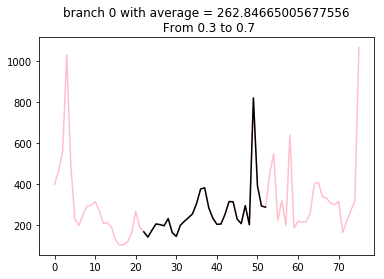

helllllooooo



average middle_distances = 241.6885297228818


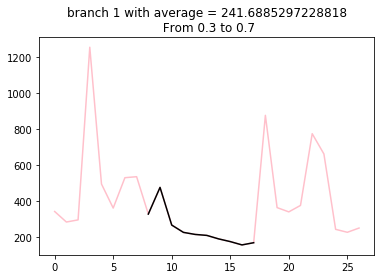

helllllooooo



average middle_distances = 302.05428559567923


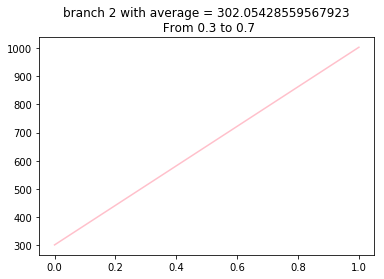

helllllooooo


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

average middle_distances = 346.74733588198285


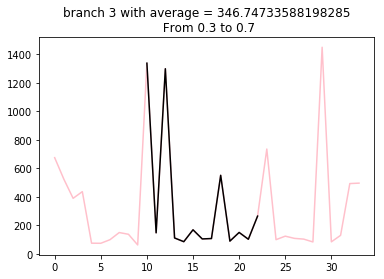

helllllooooo



average middle_distances = 373.0119889631621


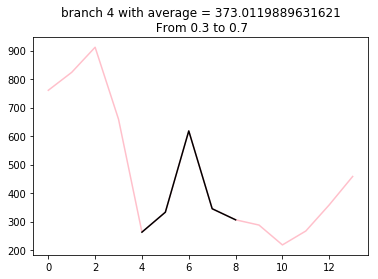

helllllooooo



average middle_distances = 494.12280676461216


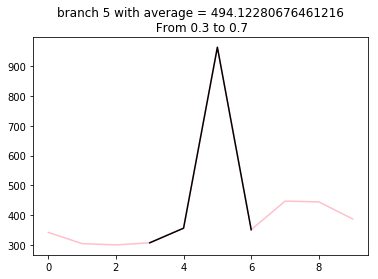

helllllooooo


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

average middle_distances = 156.4019371314199


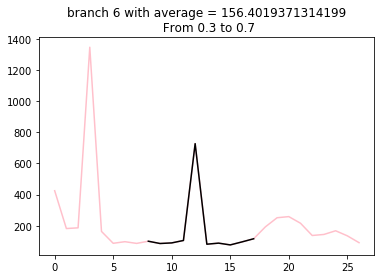

In [244]:
"""
Purpose: To establish an adaptive distance parameter threshold

1) 

"""
branch_idx = 0
total_averages = []
for branch_idx in range(7):
    #curr_limb_mesh = current_mesh_data[0]["branch_meshes"][0]
    curr_branch_skeleton = total_branch_skeletons[branch_idx]
    curr_branch_mesh = total_branch_meshes[branch_idx]
    

    #shows that we have it matched up with the right limb
    # sk.graph_skeleton_and_mesh(other_meshes=[curr_limb_mesh],
    #                           other_skeletons=[curr_branch_skeleton])


    total_distance_checks = get_skeletal_distance(
                                    curr_branch_mesh,
                                    curr_branch_skeleton,
                                    distance_threshold=3000,
                                     buffer=100,
                                    bbox_ratio=1.2,
                                    print_flag=False)

    from matplotlib import pyplot as plt

    start_perc = 0.30
    end_perc = 0.70
    total_distance_indexes = list(range(len(total_distance_checks)))
    middle_distances = total_distance_checks[int(len(total_distance_checks)*start_perc):int(len(total_distance_checks)*end_perc)]
    middle_distances_indexes = total_distance_indexes[int(len(total_distance_checks)*start_perc):int(len(total_distance_checks)*end_perc)]
    total_averages.append(np.mean(middle_distances))
    print(f"average middle_distances = {total_averages[-1]}")
    fig,ax = plt.subplots(1,1)
    ax.plot(total_distance_indexes,total_distance_checks,c="pink")
    ax.plot(middle_distances_indexes,middle_distances,c="black")
    plt.title(f"branch {branch_idx} with average = {total_averages[-1]}"
             f"\n From {start_perc} to {end_perc}")
    plt.show()


# investigating the specific branches

enpoints= [25, 34]
shortest_path = [25, 24, 23, 27.0, 22, 26.0, 17, 9, 2, 1, 10.0, 7, 15.0, 14, 19.0, 18, 11, 13.0, 16.0, 20.0, 12, 0, 3.0, 4.0, 5.0, 8.0, 6, 21.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0]
inside re-ordering
enpoints= [25, 34]
shortest_path = [25, 24, 23, 27.0, 22, 26.0, 17, 9, 2, 1, 10.0, 7, 15.0, 14, 19.0, 18, 11, 13.0, 16.0, 20.0, 12, 0, 3.0, 4.0, 5.0, 8.0, 6, 21.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0]
inside re-ordering
skeleton_node_coordinates.shape = (35, 3)


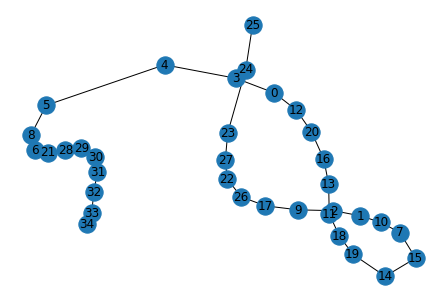

In [389]:
# # skeleton_graph = sk.convert_skeleton_to_graph(curr_branch_skeleton)



# def get_ordered_branch_nodes_coordinates(skeleton_graph,nodes=False,coordinates=True):

#     """Purpose: want to get ordered skeleton coordinates:
#     1) get both end nodes
#     2) count shortest path between them (to get order)
#     3) then use the get node attributes function

#     """
#     #find the 2 endpoints:
#     sk_graph_clean = xu.remove_selfloops(skeleton_graph)
#     enpoints = [k for k,v in dict(sk_graph_clean.degree).items() if v == 1]
#     #print(f"enpoints= {enpoints}")
#     if len(enpoints) != 2:
#         raise Exception("The number of endpoints was not 2 for a branch")

#     # gets the shortest path
#     shortest_path = nx.shortest_path(sk_graph_clean,enpoints[0],enpoints[1])
#     #print(f"shortest_path = {shortest_path}")

#     skeleton_node_coordinates = xu.get_node_attributes(skeleton_graph,node_list=shortest_path)
#     #print(f"skeleton_node_coordinates = {skeleton_node_coordinates}")

#     if nodes==False and coordinates==True:
#         return skeleton_node_coordinates
#     elif nodes==True and coordinates==False:
#         return shortest_path
#     elif nodes==True and coordinates==True:
#         return shortest_path,skeleton_node_coordinates
#     else:
#         raise Exception("neither nodes or coordinates set to return from get_ordered_branch_nodes_coordinates")


# def convert_branch_graph_to_skeleton(skeleton_graph):
#     """ Want an ordered skeleton that is only a line 
#     Pseudocode: 
#     1) Get the ordered node coordinates
#     2) Create an edge array like [(0,1),(1,2).... (n_nodes-1,n_nodes)]
#     3) index the edges intot he node coordinates and return
#     """
#     skeleton_node_coordinates = get_ordered_branch_nodes_coordinates(skeleton_graph)
#     print(f"skeleton_node_coordinates.shape = {skeleton_node_coordinates.shape}")
#     s = np.arange(0,len(skeleton_node_coordinates)).T
#     edges = np.vstack([s[:-1],s[1:]]).T
#     return skeleton_node_coordinates[edges]        

# skeleton_graph = sk.convert_skeleton_to_graph(curr_branch_skeleton)
# nx.draw(skeleton_graph,with_labels=True)
# shortest_path,skeleton_node_coordinates = get_ordered_branch_nodes_coordinates(skeleton_graph,
#                                                                               nodes=True)
# cleaned_skeleton = convert_branch_graph_to_skeleton(skeleton_graph)



# sk.graph_skeleton_and_mesh(other_meshes=[curr_branch_mesh],
#                           other_skeletons=[cleaned_skeleton[:15]])

In [419]:
cleaned_skeleton.shape

(1000, 2, 3)

In [415]:
new_skeleton

array([[[ 543722.        , 1043130.        ,  907638.        ],
        [ 543633.10726688, 1042895.25721347,  907323.201161  ]],

       [[ 543633.10726688, 1042895.25721347,  907323.201161  ],
        [ 543408.98642602, 1042541.17951364,  907900.00897542]],

       [[ 543408.98642602, 1042541.17951364,  907900.00897542],
        [ 543276.78757894, 1041810.45296994,  908179.46114132]],

       [[ 543276.78757894, 1041810.45296994,  908179.46114132],
        [ 543476.        , 1040958.46538394,  907990.73185878]],

       [[ 543476.        , 1040958.46538394,  907990.73185878],
        [ 543422.9871856 , 1040128.64465371,  907851.86791158]],

       [[ 543422.9871856 , 1040128.64465371,  907851.86791158],
        [ 543524.0878414 , 1039216.57980743,  907486.08666323]],

       [[ 543524.0878414 , 1039216.57980743,  907486.08666323],
        [ 543232.98029726, 1038411.1513839 ,  907163.28432443]],

       [[ 543232.98029726, 1038411.1513839 ,  907163.28432443],
        [ 543359.07983982,

In [337]:
sk.graph_skeleton_and_mesh(other_meshes=[curr_branch_mesh],
                          other_skeletons=[curr_branch_skeleton[:5]])

In [446]:
total_branch_skeletons[5].shape,total_branch_skeletons[4].shape

((10, 2, 3), (14, 2, 3))

In [447]:
sk = reload(sk)

#branch_idx = 6 #looked better
#branch_idx = 3 #works well now after debugging the resize branch
#branch_idx = 2 #this one is really small and has skewed distribution (but should get rid os these)
#branch_idx = 1
#branch_idx = 4
branch_idx = 5



#curr_limb_mesh = current_mesh_data[0]["branch_meshes"][0]
curr_branch_skeleton = total_branch_skeletons[branch_idx]
curr_branch_mesh = total_branch_meshes[branch_idx]

#making the skeleton smaller
new_skeleton = sk.resize_skeleton_branch(curr_branch_skeleton,segment_width = 1000)
# sk.graph_skeleton_and_mesh(other_meshes=[curr_branch_mesh]
#                           ,other_skeletons=[curr_branch_skeleton])


# #shows that we have it matched up with the right limb
# # sk.graph_skeleton_and_mesh(other_meshes=[curr_limb_mesh],
# #                           other_skeletons=[curr_branch_skeleton])


# # total_distance_checks = get_skeletal_distance(
# #                                 curr_branch_mesh,
# #                                 curr_branch_skeleton,
# #                                 distance_threshold=3000,
# #                                  buffer=100,
# #                                 bbox_ratio=1.2,
# #                                 print_flag=False)




main_mesh = curr_branch_mesh
edges = new_skeleton
buffer=100
bbox_ratio=1.2
distance_threshold=3000
print_flag=False

"""
Purpose: To return the histogram of distances along a mesh subtraction process
so that we could evenutally find an adaptive distance threshold


"""

main_mesh_bbox_restricted = main_mesh
faces_bbox_inclusion = np.arange(0,len(main_mesh.faces))


start_time = time.time()

face_subtract_indices = []

print("helllllooooo")
edge_loop_print=True
total_distances = []
for i,ex_edge in tqdm(enumerate(edges)):
    #print("\n------ New loop ------")
    #print(ex_edge)

    # ----------- creating edge and checking distance ----- #
    loop_start = time.time()

    edge_line = ex_edge[1] - ex_edge[0]
    sum_threshold = 0.001
    if np.sum(np.abs(edge_line)) < sum_threshold:
        if edge_loop_print:
            print(f"edge number {i}, {ex_edge}: has sum less than {sum_threshold} so skipping")
        continue
#         if edge_loop_print:
#             print(f"Checking Edge Distance = {time.time()-loop_start}")
#         loop_start = time.time()

    cob_edge = change_basis_matrix(edge_line)

#         if edge_loop_print:
#             print(f"Change of Basis Matrix calculation = {time.time()-loop_start}")
#         loop_start - time.time()

    #get the limits of the example edge itself that should be cutoff
    edge_trans = (cob_edge@ex_edge.T)
    #slice_range = np.sort((cob_edge@ex_edge.T)[2,:])
    slice_range = np.sort(edge_trans[2,:])

    # adding the buffer to the slice range
    slice_range_buffer = slice_range + np.array([-buffer,buffer])

#         if edge_loop_print:
#             print(f"Calculate slice= {time.time()-loop_start}")
#         loop_start = time.time()

    # generate face midpoints from the triangles
    #face_midpoints = np.mean(main_mesh_bbox_restricted.vertices[main_mesh_bbox_restricted.faces],axis=1) # Old way
    face_midpoints = main_mesh_bbox_restricted.triangles_center

#         if edge_loop_print:
#             print(f"Face midpoints= {time.time()-loop_start}")
#         loop_start = time.time()

    #get the face midpoints that fall within the slice (by lookig at the z component)
    fac_midpoints_trans = cob_edge@face_midpoints.T

#         if edge_loop_print:
#             print(f"Face midpoints transform= {time.time()-loop_start}")
#         loop_start = time.time()



#         if edge_loop_print:
#             print(f"edge midpoint= {time.time()-loop_start}")
#         loop_start = time.time()

    slice_mask_pre_distance = ((fac_midpoints_trans[2,:]>slice_range_buffer[0]) & 
                  (fac_midpoints_trans[2,:]<slice_range_buffer[1]))

#         if edge_loop_print:
#             print(f"Applying slice restriction = {time.time()-loop_start}")
#         loop_start = time.time()


    """ 6/18 change
    # apply the distance threshold to the slice mask
    edge_midpoint = np.mean(ex_edge,axis=0)
    #raise Exception("Add in part for distance threshold here")
    distance_check = np.linalg.norm(face_midpoints[:,:2] - edge_midpoint[:2],axis=1) < distance_threshold

    """

#         edge_midpoint = np.mean(cob_edge.T,axis=0)
#         distance_check = np.linalg.norm((fac_midpoints_trans.T)[:,:2] - edge_midpoint[:2],axis=1) < distance_threshold

    edge_midpoint = np.mean(edge_trans.T,axis=0)
    distance_check = np.linalg.norm((fac_midpoints_trans.T)[:,:2] - edge_midpoint[:2],axis=1) < distance_threshold

    slice_mask = slice_mask_pre_distance & distance_check

#         if edge_loop_print:
#             print(f"Applying distance restriction= {time.time()-loop_start}")
#         loop_start = time.time()


    face_list = np.arange(0,len(main_mesh_bbox_restricted.faces))[slice_mask]

    #get the submesh of valid faces within the slice
    if len(face_list)>0:
        main_mesh_sub = main_mesh_bbox_restricted.submesh([face_list],append=True)
    else:
        main_mesh_sub = []


    #print("hello current_test")
    if type(main_mesh_sub) != type(trimesh.Trimesh()):
        if edge_loop_print:
            print(f"THERE WERE NO FACES THAT FIT THE DISTANCE ({distance_threshold}) and Z transform requirements")
            print("So just skipping this edge")
        continue

#         if edge_loop_print:
#             print(f"getting submesh= {time.time()-loop_start}")
#         loop_start = time.time()

    #get all disconnected mesh pieces of the submesh and the face indices for lookup later
    sub_components,sub_components_face_indexes = tu.split(main_mesh_sub,only_watertight=False)
    if type(sub_components) != type(np.array([])) and type(sub_components) != list:
        #print(f"meshes = {sub_components}, with type = {type(sub_components)}")
        if type(sub_components) == type(trimesh.Trimesh()) :
            sub_components = [sub_components]
        else:
            raise Exception("The sub_components were not an array, list or trimesh")

#         if edge_loop_print:
#             print(f"splitting the mesh= {time.time()-loop_start}")
#         loop_start = time.time()

    #getting the indices of the submeshes whose bounding box contain the edge 
    """ 6-19: might want to use bounding_box_oriented? BUT THIS CHANGE COULD SLOW IT DOWN
    contains_points_results = np.array([s_comp.bounding_box_oriented.contains(ex_edge.reshape(-1,3)) for s_comp in sub_components])
    """
    contains_points_results = np.array([s_comp.bounding_box.contains(ex_edge.reshape(-1,3)) for s_comp in sub_components])

    containing_indices = (np.arange(0,len(sub_components)))[np.sum(contains_points_results,axis=1) >= len(ex_edge)]

#         if edge_loop_print:
#             print(f"containing indices= {time.time()-loop_start}")
#         loop_start = time.time()

    if len(containing_indices) != 1: 
        if edge_loop_print:
            print(f"--> Not exactly one containing mesh: {containing_indices}")
        if len(containing_indices) > 1:
            sub_components_inner = sub_components[containing_indices]
            sub_components_face_indexes_inner = sub_components_face_indexes[containing_indices]
        else:
            sub_components_inner = sub_components
            sub_components_face_indexes_inner = sub_components_face_indexes

        #get the center of the edge
        edge_center = np.mean(ex_edge,axis=0)
        #print(f"edge_center = {edge_center}")

        #find the distance between eacch bbox center and the edge center
        bbox_centers = [np.mean(k.bounds,axis=0) for k in sub_components_inner]
        #print(f"bbox_centers = {bbox_centers}")
        closest_bbox = np.argmin([np.linalg.norm(edge_center-b_center) for b_center in bbox_centers])
        #print(f"bbox_distance = {closest_bbox}")
        edge_skeleton_faces = faces_bbox_inclusion[face_list[sub_components_face_indexes_inner[closest_bbox]]]

#             if edge_loop_print:
#                 print(f"finding closest box when 0 or 2 or more containing boxes= {time.time()-loop_start}")
#             loop_start = time.time()
    else:# when only one viable submesh piece and just using that sole index
        #print(f"only one viable submesh piece so using index only number in: {containing_indices}")

        edge_skeleton_faces = faces_bbox_inclusion[face_list[sub_components_face_indexes[containing_indices[0]]]]
#             if edge_loop_print:
#                 print(f"only 1 containig face getting the edge_skeleton_faces= {time.time()-loop_start}")
#             loop_start = time.time()

    if len(edge_skeleton_faces) < 0:
        print(f"****** Warning the edge index {i}: had no faces in the edge_skeleton_faces*******")
    face_subtract_indices.append(edge_skeleton_faces)


    #---- calculating the relevant distances ---- #

    face_midpoints = (main_mesh_bbox_restricted.triangles_center)[edge_skeleton_faces]
    #print(f"edge_skeleton_faces.shape = {edge_skeleton_faces.shape}")
    fac_midpoints_trans = cob_edge@face_midpoints.T
    #print(f"fac_midpoints_trans.shape = {fac_midpoints_trans.shape}")
    mesh_slice_distances = np.linalg.norm((fac_midpoints_trans.T)[:,:2] - edge_midpoint[:2],axis=1)
    #print(f"mesh_slice_distances.shape = {mesh_slice_distances.shape}")

    total_distances.append(np.mean(mesh_slice_distances))
    
    
    submesh_edge = main_mesh.submesh([edge_skeleton_faces],append=True)

    
    if i == 30:
        break
    else:
        sk.graph_skeleton_and_mesh(other_meshes=[main_mesh,submesh_edge],
                                  other_meshes_colors=["random"],
                                  other_skeletons=[ex_edge])

# from matplotlib import pyplot as plt

# total_distance_checks = total_distances

# start_perc = 0.30
# end_perc = 0.70
# total_distance_indexes = list(range(len(total_distance_checks)))
# middle_distances = total_distance_checks[int(len(total_distance_checks)*start_perc):int(len(total_distance_checks)*end_perc)]
# middle_distances_indexes = total_distance_indexes[int(len(total_distance_checks)*start_perc):int(len(total_distance_checks)*end_perc)]
# total_averages.append(np.mean(middle_distances))
# print(f"average middle_distances = {total_averages[-1]}")
# fig,ax = plt.subplots(1,1)
# ax.plot(total_distance_indexes,total_distance_checks,c="pink")
# ax.plot(middle_distances_indexes,middle_distances,c="black")
# plt.title(f"branch {branch_idx} with average = {total_averages[-1]}"
#          f"\n From {start_perc} to {end_perc}")
# plt.show()
    


new_skeleton = (5, 2, 3)
helllllooooo


In [448]:
np.mean(total_distances)

531.6716819451411

average middle_distances = 355.2696196465731


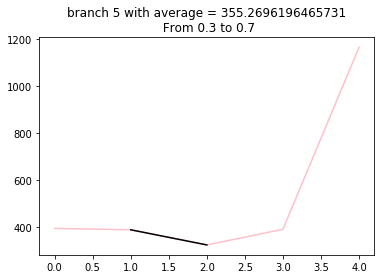

In [449]:
total_distance_checks = total_distances

start_perc = 0.30
end_perc = 0.70
total_distance_indexes = list(range(len(total_distance_checks)))
middle_distances = total_distance_checks[int(len(total_distance_checks)*start_perc):int(len(total_distance_checks)*end_perc)]
middle_distances_indexes = total_distance_indexes[int(len(total_distance_checks)*start_perc):int(len(total_distance_checks)*end_perc)]
total_averages.append(np.mean(middle_distances))
print(f"average middle_distances = {total_averages[-1]}")
fig,ax = plt.subplots(1,1)
ax.plot(total_distance_indexes,total_distance_checks,c="pink")
ax.plot(middle_distances_indexes,middle_distances,c="black")
plt.title(f"branch {branch_idx} with average = {total_averages[-1]}"
         f"\n From {start_perc} to {end_perc}")
plt.show()

In [450]:
branch_idx

5

In [284]:
x = np.array([0.0, 6.4, 3.0, 1.6])
bins = np.array([0.0, 1.0, 2.5, 4.0, 10.0])
inds = np.digitize(x, bins)
np.unique(inds)
#output --> array([1, 4, 3, 2])

array([1, 2, 3, 4])

In [ ]:
"""
6/19 leave off
shows that now the average is much lower which is what we expected for something that small
- could now identify the axon
- can have a more adaptive mesh subtaction

* should still just cut off the ends and get rid of any outliers

"""